## Arun Kumar Kudurumalla
### Advanced Machine Learning (Time Series Data)
### Assignment - 3

### Importing the required libraries 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/Arun/Downloads/arun_AML_RNN'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:/Users/YeswantH/Downloads/arun_AML_RNN\DailyDelhiClimateTest.csv
C:/Users/YeswantH/Downloads/arun_AML_RNN\DailyDelhiClimateTrain.csv


### Reading the data into the train and test data frames

In [2]:
train_data = pd.read_csv('C:/Users/Arun/Downloads/arun_AML_RNN/DailyDelhiClimateTrain.csv')
test_data = pd.read_csv('C:/Users/Arun/Downloads/arun_AML_RNN/DailyDelhiClimateTest.csv')

### Converting the data into regular format

In [3]:
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

### Visualizing the 4 diffferent categories of time-series data in the dataset

In [4]:
def Visualize(kind='hist',figsize=(10,10)):
    def Col():
        cols = ['meantemp','humidity','wind_speed','meanpressure']
        for c in cols:
            yield c

    fig,axes = plt.subplots(nrows=2,ncols=2,figsize=figsize)
    col = Col()
    for i in range(2):
        for j in range(2):
            curr = next(col)
            if kind == 'hist':
                axes[i,j].hist(train_data[curr])
            elif kind == 'plot':
                axes[i,j].plot(train_data['date'],train_data[curr])
                plt.gcf().autofmt_xdate()
            axes[i,j].set_title(curr)
    if kind=='hist':
        plt.savefig('data_hist.png')
    else:
        plt.savefig('data_plot.png')

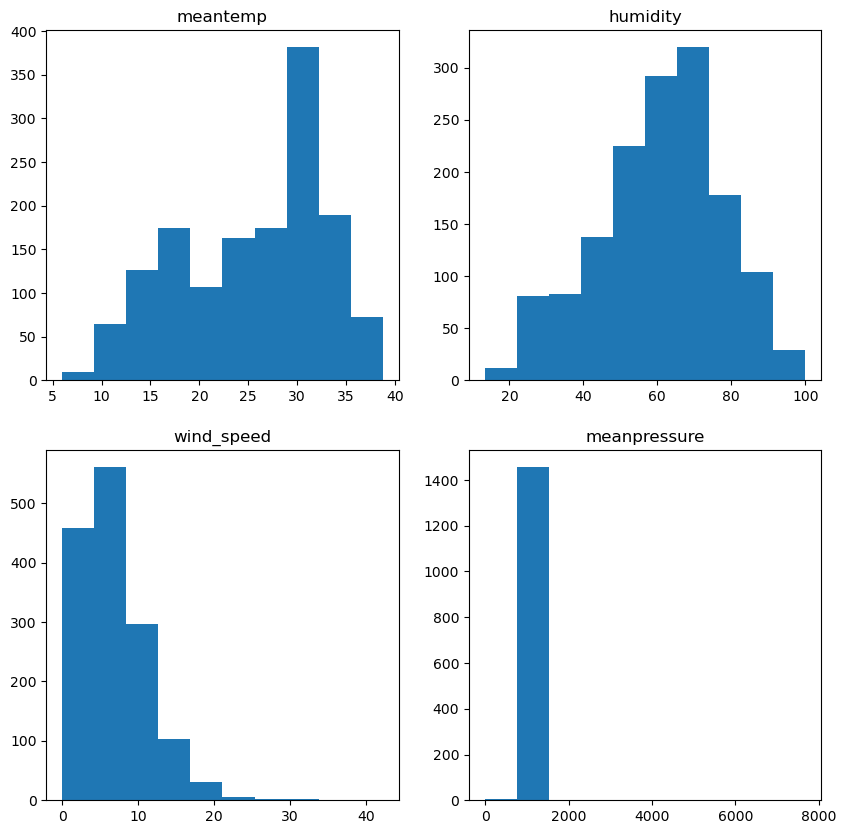

In [5]:
Visualize('hist')


### Plotting the data in a wave form

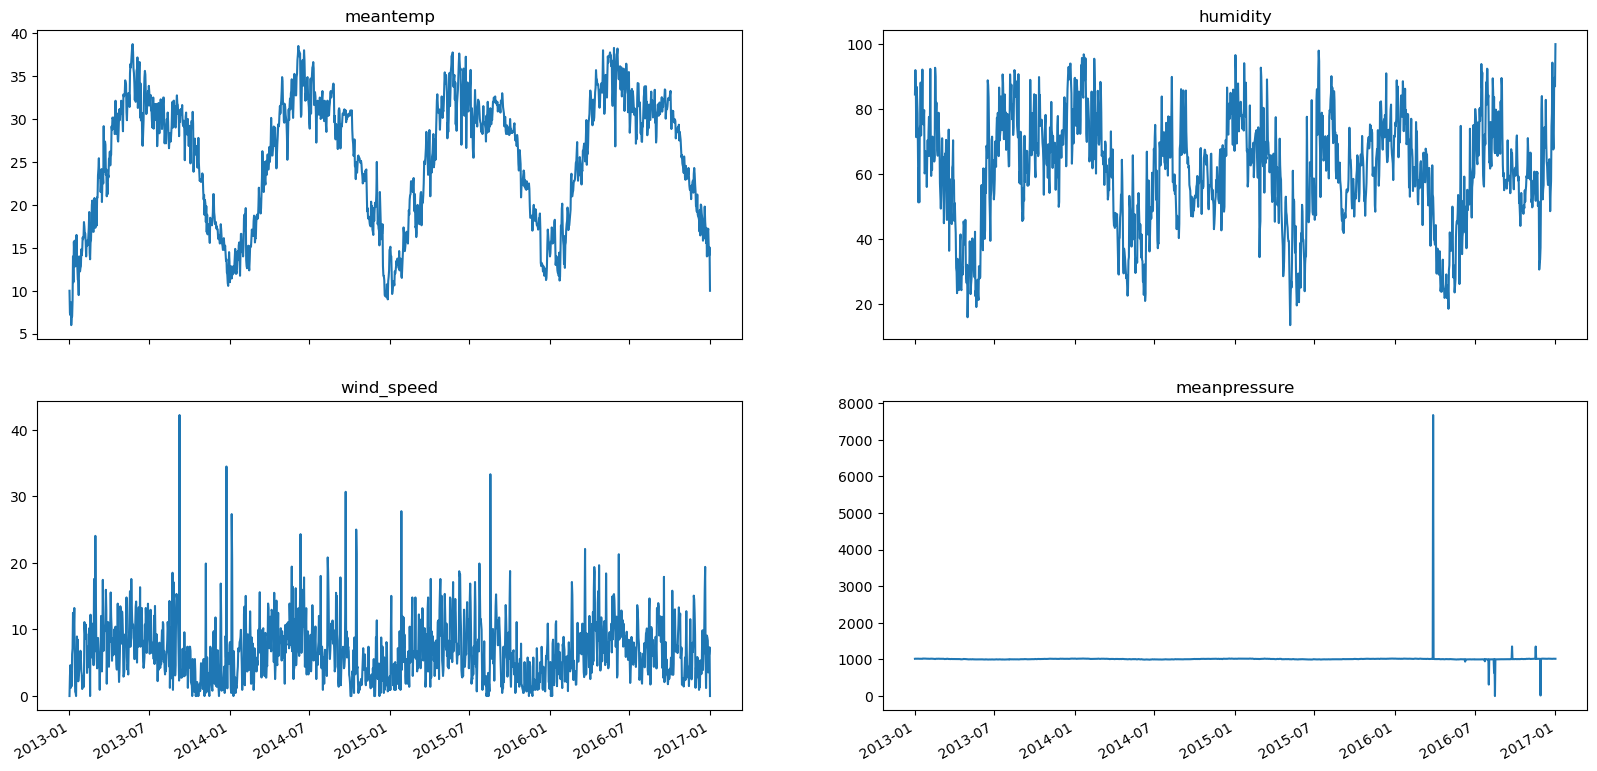

In [6]:
Visualize('plot',(20,10))

### Pre-processing of the data

In [7]:
def process_data(data):
    x,y = [],[]
    switch = False
    
    if len(data)%2 == 1:
        last = False
    else:
        last = True
    
    for i in range(len(data)):
        if i == len(data)-1:
            if not last:
                break
        if switch:
            y.append(data[i])
            switch = False
        else:
            x.append(data[i])
            switch = True
    
    def reshape(d):
        d = np.array(d)
        d = np.reshape(d,(d.shape[0],1,1))
        return d
    return (reshape(x),np.array(y))

### Applying the pre-processing function on train and test data

In [8]:
x_train_meantemp,y_train_meantemp = process_data(train_data.meantemp)
x_test_meantemp,y_test_meantemp = process_data(test_data.meantemp)

In [9]:
x_train_humidity,y_train_humidity = process_data(train_data.humidity)
x_test_humidity,y_test_humidity = process_data(test_data.humidity)

In [10]:
x_train_wind_speed,y_train_wind_speed = process_data(train_data.wind_speed)
x_test_wind_speed,y_test_wind_speed = process_data(test_data.wind_speed)

In [11]:
x_train_meanpressure,y_train_meanpressure = process_data(train_data.meanpressure)
x_test_meanpressure,y_test_meanpressure = process_data(test_data.meanpressure)

### Models building and architecture

In [12]:
model_meantemp = keras.Sequential([
    keras.layers.GRU(8,input_shape=(1,1,)),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1)
])

In [13]:
model_humidity = keras.Sequential([
    keras.layers.GRU(8,input_shape=(1,1,)),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1)
])

In [14]:
model_wind_speed = keras.Sequential([
    keras.layers.GRU(8,input_shape=(1,1,)),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1)
])

In [15]:
model_meanpressure = keras.Sequential([
    keras.layers.GRU(8,input_shape=(1,1,)),
    keras.layers.Dense(16,activation='tanh'),
    keras.layers.Dense(32,activation='tanh'),
    keras.layers.Dense(64,activation='tanh'),
    keras.layers.Dense(1)
])

### Compiling the models 

In [16]:
model_meantemp.compile(loss='mse',optimizer='adam')

In [17]:
model_humidity.compile(loss='mse',optimizer='adam')

In [18]:
model_wind_speed.compile(loss='mse',optimizer='adam')

In [19]:
model_meanpressure.compile(loss='mse',optimizer='adam')

In [20]:
model_meantemp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 8)                 264       
                                                                 
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 985 (3.85 KB)
Trainable params: 985 (3.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training the models with the training data and validating them

In [21]:
os.makedirs('logs',exist_ok=True)
logdir = os.path.join('logs',datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

In [22]:
callback = keras.callbacks.TensorBoard(logdir)
earlyStoping = keras.callbacks.EarlyStopping(monitor='loss',patience=3)

In [23]:
history_humidity = model_humidity.fit(x_train_humidity,y_train_humidity,epochs=100,verbose=2,batch_size=16,callbacks=[callback,earlyStoping])

Epoch 1/100
46/46 - 2s - loss: 3925.4617 - 2s/epoch - 51ms/step
Epoch 2/100
46/46 - 0s - loss: 3721.3130 - 122ms/epoch - 3ms/step
Epoch 3/100
46/46 - 0s - loss: 3197.3564 - 132ms/epoch - 3ms/step
Epoch 4/100
46/46 - 0s - loss: 2331.4836 - 133ms/epoch - 3ms/step
Epoch 5/100
46/46 - 0s - loss: 1376.0094 - 134ms/epoch - 3ms/step
Epoch 6/100
46/46 - 0s - loss: 645.8209 - 133ms/epoch - 3ms/step
Epoch 7/100
46/46 - 0s - loss: 324.4250 - 133ms/epoch - 3ms/step
Epoch 8/100
46/46 - 0s - loss: 225.6918 - 135ms/epoch - 3ms/step
Epoch 9/100
46/46 - 0s - loss: 155.9612 - 134ms/epoch - 3ms/step
Epoch 10/100
46/46 - 0s - loss: 108.8692 - 132ms/epoch - 3ms/step
Epoch 11/100
46/46 - 0s - loss: 87.4220 - 134ms/epoch - 3ms/step
Epoch 12/100
46/46 - 0s - loss: 77.9290 - 149ms/epoch - 3ms/step
Epoch 13/100
46/46 - 0s - loss: 74.5218 - 135ms/epoch - 3ms/step
Epoch 14/100
46/46 - 0s - loss: 71.8999 - 133ms/epoch - 3ms/step
Epoch 15/100
46/46 - 0s - loss: 71.2449 - 133ms/epoch - 3ms/step
Epoch 16/100
46/46 - 

In [24]:
history_meantemp = model_meantemp.fit(x_train_meantemp,y_train_meantemp,epochs=100,verbose=2,batch_size=16,callbacks=[callback,earlyStoping])

Epoch 1/100
46/46 - 2s - loss: 650.3699 - 2s/epoch - 51ms/step
Epoch 2/100
46/46 - 0s - loss: 516.8016 - 135ms/epoch - 3ms/step
Epoch 3/100
46/46 - 0s - loss: 291.8326 - 133ms/epoch - 3ms/step
Epoch 4/100
46/46 - 0s - loss: 97.4099 - 124ms/epoch - 3ms/step
Epoch 5/100
46/46 - 0s - loss: 47.1615 - 133ms/epoch - 3ms/step
Epoch 6/100
46/46 - 0s - loss: 29.0423 - 133ms/epoch - 3ms/step
Epoch 7/100
46/46 - 0s - loss: 10.4884 - 134ms/epoch - 3ms/step
Epoch 8/100
46/46 - 0s - loss: 5.1965 - 133ms/epoch - 3ms/step
Epoch 9/100
46/46 - 0s - loss: 3.9463 - 133ms/epoch - 3ms/step
Epoch 10/100
46/46 - 0s - loss: 3.7155 - 135ms/epoch - 3ms/step
Epoch 11/100
46/46 - 0s - loss: 3.2472 - 131ms/epoch - 3ms/step
Epoch 12/100
46/46 - 0s - loss: 3.0378 - 133ms/epoch - 3ms/step
Epoch 13/100
46/46 - 0s - loss: 3.0256 - 135ms/epoch - 3ms/step
Epoch 14/100
46/46 - 0s - loss: 2.8985 - 132ms/epoch - 3ms/step
Epoch 15/100
46/46 - 0s - loss: 2.9646 - 134ms/epoch - 3ms/step
Epoch 16/100
46/46 - 0s - loss: 2.7998 - 

In [25]:
history_wind_speed = model_wind_speed.fit(x_train_wind_speed,y_train_wind_speed,epochs=100,verbose=2,batch_size=16,callbacks=[callback,earlyStoping])

Epoch 1/100
46/46 - 2s - loss: 49.0710 - 2s/epoch - 51ms/step
Epoch 2/100
46/46 - 0s - loss: 19.2668 - 137ms/epoch - 3ms/step
Epoch 3/100
46/46 - 0s - loss: 17.1051 - 130ms/epoch - 3ms/step
Epoch 4/100
46/46 - 0s - loss: 16.7571 - 136ms/epoch - 3ms/step
Epoch 5/100
46/46 - 0s - loss: 16.4721 - 135ms/epoch - 3ms/step
Epoch 6/100
46/46 - 0s - loss: 16.4099 - 131ms/epoch - 3ms/step
Epoch 7/100
46/46 - 0s - loss: 16.2295 - 135ms/epoch - 3ms/step
Epoch 8/100
46/46 - 0s - loss: 16.2948 - 131ms/epoch - 3ms/step
Epoch 9/100
46/46 - 0s - loss: 16.2587 - 134ms/epoch - 3ms/step
Epoch 10/100
46/46 - 0s - loss: 16.2888 - 133ms/epoch - 3ms/step


In [26]:
history_meanpressure = model_meanpressure.fit(x_train_meanpressure,y_train_meanpressure,epochs=1000,verbose=2,batch_size=16,callbacks=[callback,earlyStoping])

Epoch 1/1000
46/46 - 2s - loss: 1005953.5000 - 2s/epoch - 52ms/step
Epoch 2/1000
46/46 - 0s - loss: 987527.0625 - 136ms/epoch - 3ms/step
Epoch 3/1000
46/46 - 0s - loss: 975036.8750 - 131ms/epoch - 3ms/step
Epoch 4/1000
46/46 - 0s - loss: 967057.7500 - 136ms/epoch - 3ms/step
Epoch 5/1000
46/46 - 0s - loss: 959997.8125 - 133ms/epoch - 3ms/step
Epoch 6/1000
46/46 - 0s - loss: 953329.5625 - 120ms/epoch - 3ms/step
Epoch 7/1000
46/46 - 0s - loss: 946891.8125 - 130ms/epoch - 3ms/step
Epoch 8/1000
46/46 - 0s - loss: 940615.6250 - 145ms/epoch - 3ms/step
Epoch 9/1000
46/46 - 0s - loss: 934453.8750 - 124ms/epoch - 3ms/step
Epoch 10/1000
46/46 - 0s - loss: 928389.1875 - 149ms/epoch - 3ms/step
Epoch 11/1000
46/46 - 0s - loss: 922402.5000 - 132ms/epoch - 3ms/step
Epoch 12/1000
46/46 - 0s - loss: 916479.3750 - 135ms/epoch - 3ms/step
Epoch 13/1000
46/46 - 0s - loss: 910617.7500 - 133ms/epoch - 3ms/step
Epoch 14/1000
46/46 - 0s - loss: 904807.8125 - 149ms/epoch - 3ms/step
Epoch 15/1000
46/46 - 0s - los

Epoch 118/1000
46/46 - 0s - loss: 432606.1562 - 118ms/epoch - 3ms/step
Epoch 119/1000
46/46 - 0s - loss: 429029.4688 - 134ms/epoch - 3ms/step
Epoch 120/1000
46/46 - 0s - loss: 425465.3438 - 132ms/epoch - 3ms/step
Epoch 121/1000
46/46 - 0s - loss: 421921.9375 - 133ms/epoch - 3ms/step
Epoch 122/1000
46/46 - 0s - loss: 418389.9375 - 129ms/epoch - 3ms/step
Epoch 123/1000
46/46 - 0s - loss: 414879.8125 - 122ms/epoch - 3ms/step
Epoch 124/1000
46/46 - 0s - loss: 411382.5000 - 133ms/epoch - 3ms/step
Epoch 125/1000
46/46 - 0s - loss: 407901.1875 - 134ms/epoch - 3ms/step
Epoch 126/1000
46/46 - 0s - loss: 404438.8125 - 117ms/epoch - 3ms/step
Epoch 127/1000
46/46 - 0s - loss: 400991.1562 - 117ms/epoch - 3ms/step
Epoch 128/1000
46/46 - 0s - loss: 397560.5938 - 132ms/epoch - 3ms/step
Epoch 129/1000
46/46 - 0s - loss: 394146.8438 - 134ms/epoch - 3ms/step
Epoch 130/1000
46/46 - 0s - loss: 390746.5625 - 132ms/epoch - 3ms/step
Epoch 131/1000
46/46 - 0s - loss: 387366.1875 - 118ms/epoch - 3ms/step
Epoch 

Epoch 234/1000
46/46 - 0s - loss: 123871.5703 - 118ms/epoch - 3ms/step
Epoch 235/1000
46/46 - 0s - loss: 122110.8750 - 133ms/epoch - 3ms/step
Epoch 236/1000
46/46 - 0s - loss: 120367.7266 - 132ms/epoch - 3ms/step
Epoch 237/1000
46/46 - 0s - loss: 118637.1641 - 134ms/epoch - 3ms/step
Epoch 238/1000
46/46 - 0s - loss: 116923.4219 - 117ms/epoch - 3ms/step
Epoch 239/1000
46/46 - 0s - loss: 115220.9453 - 133ms/epoch - 3ms/step
Epoch 240/1000
46/46 - 0s - loss: 113536.4688 - 132ms/epoch - 3ms/step
Epoch 241/1000
46/46 - 0s - loss: 111864.2188 - 119ms/epoch - 3ms/step
Epoch 242/1000
46/46 - 0s - loss: 110207.3516 - 132ms/epoch - 3ms/step
Epoch 243/1000
46/46 - 0s - loss: 108565.1875 - 129ms/epoch - 3ms/step
Epoch 244/1000
46/46 - 0s - loss: 106937.5469 - 119ms/epoch - 3ms/step
Epoch 245/1000
46/46 - 0s - loss: 105324.7188 - 132ms/epoch - 3ms/step
Epoch 246/1000
46/46 - 0s - loss: 103726.2812 - 132ms/epoch - 3ms/step
Epoch 247/1000
46/46 - 0s - loss: 102141.8438 - 133ms/epoch - 3ms/step
Epoch 

Epoch 351/1000
46/46 - 0s - loss: 10094.1650 - 135ms/epoch - 3ms/step
Epoch 352/1000
46/46 - 0s - loss: 9809.5762 - 117ms/epoch - 3ms/step
Epoch 353/1000
46/46 - 0s - loss: 9535.0508 - 117ms/epoch - 3ms/step
Epoch 354/1000
46/46 - 0s - loss: 9267.5557 - 133ms/epoch - 3ms/step
Epoch 355/1000
46/46 - 0s - loss: 9007.9600 - 129ms/epoch - 3ms/step
Epoch 356/1000
46/46 - 0s - loss: 8758.1846 - 122ms/epoch - 3ms/step
Epoch 357/1000
46/46 - 0s - loss: 8514.7793 - 131ms/epoch - 3ms/step
Epoch 358/1000
46/46 - 0s - loss: 8281.5654 - 120ms/epoch - 3ms/step
Epoch 359/1000
46/46 - 0s - loss: 8054.8442 - 133ms/epoch - 3ms/step
Epoch 360/1000
46/46 - 0s - loss: 7835.5225 - 132ms/epoch - 3ms/step
Epoch 361/1000
46/46 - 0s - loss: 7625.1538 - 117ms/epoch - 3ms/step
Epoch 362/1000
46/46 - 0s - loss: 7421.5664 - 119ms/epoch - 3ms/step
Epoch 363/1000
46/46 - 0s - loss: 7225.1489 - 131ms/epoch - 3ms/step
Epoch 364/1000
46/46 - 0s - loss: 7037.1001 - 117ms/epoch - 3ms/step
Epoch 365/1000
46/46 - 0s - loss:

In [27]:
def Gen_hist():
    all_hist = ['history_humidity','history_meanpressure','history_meantemp','history_wind_speed']
    for hist in all_hist:
        yield hist

### Plotting the loss graphs of the different models

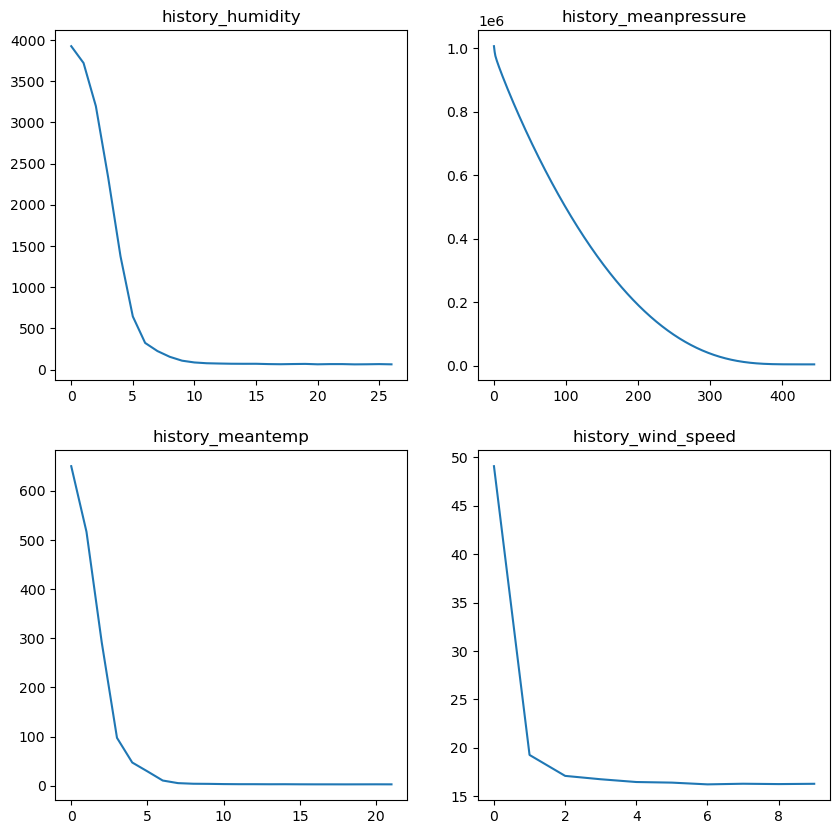

In [28]:
gen_hist = Gen_hist()
fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
for i in range(2):
    for j in range(2):
        hist_now = next(gen_hist)
        axes[i,j].plot(eval(hist_now).history['loss'])
        axes[i,j].set_title(hist_now)
plt.savefig('loss_history.png')

### Predicting the weather using the time series data

In [29]:
def Gen_test():
    all_test = ['x_test_wind_speed','x_test_humidity','x_test_meantemp','x_test_meanpressure']
    all_y = ['y_test_wind_speed','y_test_humidity','y_test_meantemp','y_test_meanpressure']
    all_model = ['model_wind_speed','model_humidity','model_meantemp','model_meanpressure']
    for test in zip(all_test,all_y,all_model):
        yield test

2/2 [==============================] - 0s 0s/step


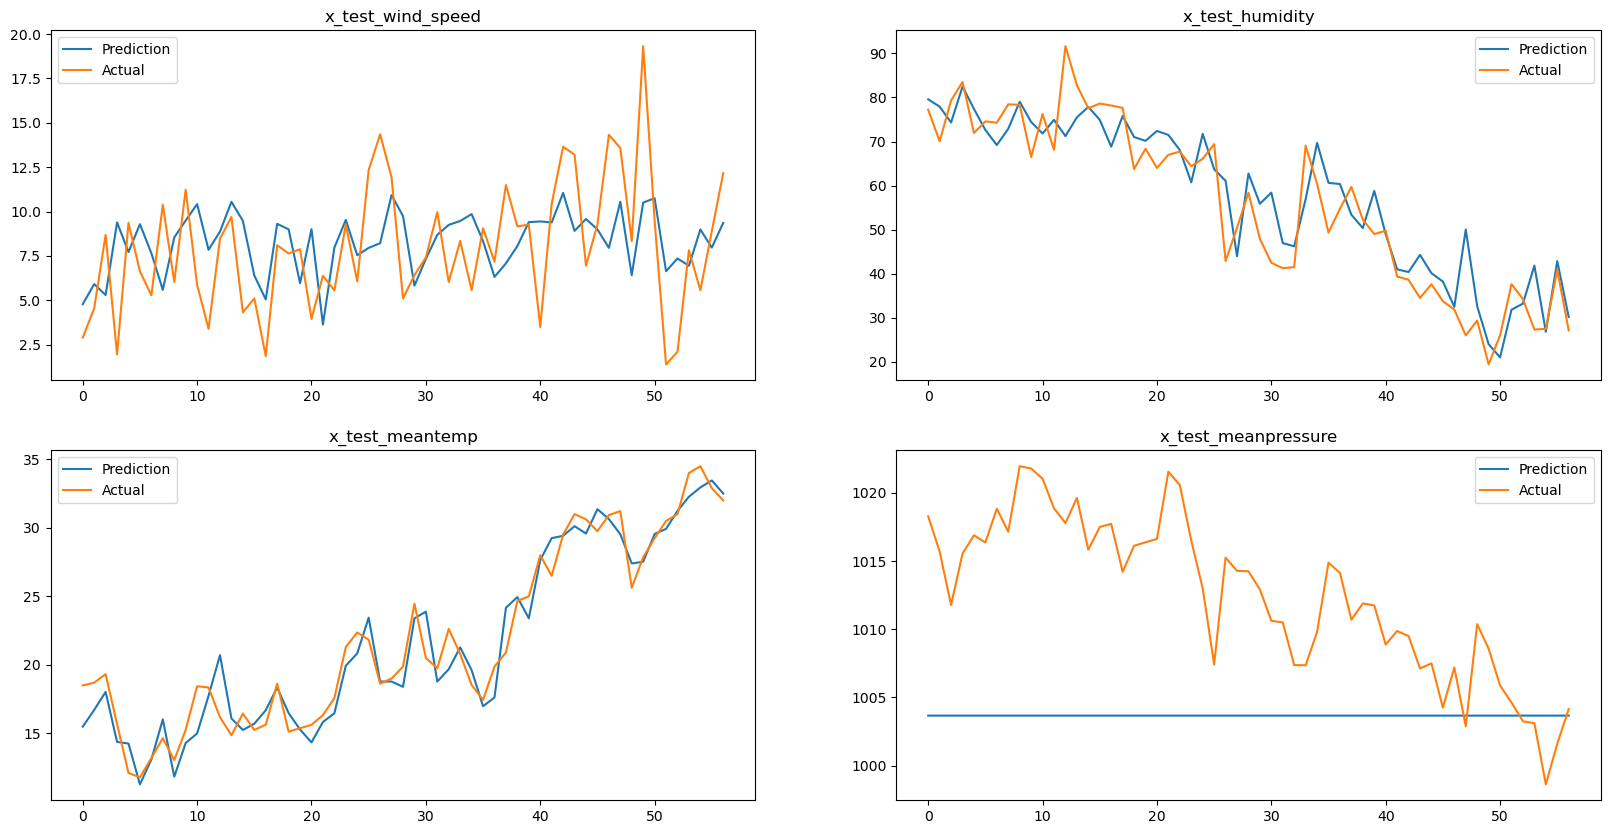

In [30]:
gen_test = Gen_test()
fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(20,10))
for i in range(2):
    for j in range(2):
        test_now = next(gen_test)
        axes[i,j].plot(eval(test_now[2]).predict(eval(test_now[0])),label='Prediction')
        axes[i,j].plot(eval(test_now[1]),label='Actual')
        axes[i,j].set_title(test_now[0])
        axes[i,j].legend()
plt.savefig('prediction.png')

In [31]:
os.makedirs('models',exist_ok=True)

### Improving Models performance

### 1) Using layer_lstm() instead of layer_gru()

In [32]:
model1_meantemp = keras.Sequential([
    keras.layers.LSTM(8,input_shape=(1,1,)),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1)
])

In [34]:
model1_humidity = keras.Sequential([
    keras.layers.LSTM(8,input_shape=(1,1,)),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1)
])

In [35]:
model1_wind_speed = keras.Sequential([
    keras.layers.LSTM(8,input_shape=(1,1,)),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1)
])

In [36]:
model1_meanpressure = keras.Sequential([
    keras.layers.LSTM(8,input_shape=(1,1,)),
    keras.layers.Dense(16,activation='tanh'),
    keras.layers.Dense(32,activation='tanh'),
    keras.layers.Dense(64,activation='tanh'),
    keras.layers.Dense(1)
])

In [37]:
model1_meantemp.compile(loss='mse',optimizer='adam')
model1_humidity.compile(loss='mse',optimizer='adam')
model1_wind_speed.compile(loss='mse',optimizer='adam')
model1_meanpressure.compile(loss='mse',optimizer='adam')

In [38]:
history1_humidity = model1_humidity.fit(x_train_humidity,y_train_humidity,epochs=100,verbose=2,batch_size=16,callbacks=[callback,earlyStoping])

Epoch 1/100
46/46 - 2s - loss: 3963.6135 - 2s/epoch - 48ms/step
Epoch 2/100
46/46 - 0s - loss: 3889.0544 - 151ms/epoch - 3ms/step
Epoch 3/100
46/46 - 0s - loss: 3500.6328 - 128ms/epoch - 3ms/step
Epoch 4/100
46/46 - 0s - loss: 2126.1179 - 131ms/epoch - 3ms/step
Epoch 5/100
46/46 - 0s - loss: 738.6169 - 122ms/epoch - 3ms/step
Epoch 6/100
46/46 - 0s - loss: 270.3648 - 140ms/epoch - 3ms/step
Epoch 7/100
46/46 - 0s - loss: 194.1878 - 130ms/epoch - 3ms/step
Epoch 8/100
46/46 - 0s - loss: 139.0719 - 129ms/epoch - 3ms/step
Epoch 9/100
46/46 - 0s - loss: 107.1884 - 124ms/epoch - 3ms/step
Epoch 10/100
46/46 - 0s - loss: 85.8247 - 119ms/epoch - 3ms/step
Epoch 11/100
46/46 - 0s - loss: 76.6262 - 134ms/epoch - 3ms/step
Epoch 12/100
46/46 - 0s - loss: 71.5407 - 141ms/epoch - 3ms/step
Epoch 13/100
46/46 - 0s - loss: 68.2660 - 126ms/epoch - 3ms/step
Epoch 14/100
46/46 - 0s - loss: 66.5848 - 135ms/epoch - 3ms/step
Epoch 15/100
46/46 - 0s - loss: 65.4801 - 133ms/epoch - 3ms/step
Epoch 16/100
46/46 - 0s

In [39]:
history1_meantemp = model1_meantemp.fit(x_train_meantemp,y_train_meantemp,epochs=100,verbose=2,batch_size=16,callbacks=[callback,earlyStoping])

Epoch 1/100
46/46 - 2s - loss: 676.1584 - 2s/epoch - 48ms/step
Epoch 2/100
46/46 - 0s - loss: 580.0793 - 124ms/epoch - 3ms/step
Epoch 3/100
46/46 - 0s - loss: 381.2299 - 132ms/epoch - 3ms/step
Epoch 4/100
46/46 - 0s - loss: 132.2481 - 136ms/epoch - 3ms/step
Epoch 5/100
46/46 - 0s - loss: 43.4971 - 114ms/epoch - 2ms/step
Epoch 6/100
46/46 - 0s - loss: 25.7076 - 119ms/epoch - 3ms/step
Epoch 7/100
46/46 - 0s - loss: 10.9361 - 147ms/epoch - 3ms/step
Epoch 8/100
46/46 - 0s - loss: 5.4234 - 165ms/epoch - 4ms/step
Epoch 9/100
46/46 - 0s - loss: 4.0332 - 118ms/epoch - 3ms/step
Epoch 10/100
46/46 - 0s - loss: 3.5563 - 116ms/epoch - 3ms/step
Epoch 11/100
46/46 - 0s - loss: 3.3333 - 133ms/epoch - 3ms/step
Epoch 12/100
46/46 - 0s - loss: 3.0918 - 166ms/epoch - 4ms/step
Epoch 13/100
46/46 - 0s - loss: 2.9496 - 150ms/epoch - 3ms/step
Epoch 14/100
46/46 - 0s - loss: 2.8431 - 122ms/epoch - 3ms/step
Epoch 15/100
46/46 - 0s - loss: 2.8074 - 166ms/epoch - 4ms/step
Epoch 16/100
46/46 - 0s - loss: 2.7797 -

In [40]:
history1_meanpressure = model1_meanpressure.fit(x_train_meanpressure,y_train_meanpressure,epochs=1000,verbose=2,batch_size=16,callbacks=[callback,earlyStoping])

Epoch 1/1000
46/46 - 3s - loss: 1005963.8125 - 3s/epoch - 61ms/step
Epoch 2/1000
46/46 - 0s - loss: 990008.6250 - 171ms/epoch - 4ms/step
Epoch 3/1000
46/46 - 0s - loss: 978709.6250 - 133ms/epoch - 3ms/step
Epoch 4/1000
46/46 - 0s - loss: 970863.5625 - 147ms/epoch - 3ms/step
Epoch 5/1000
46/46 - 0s - loss: 963851.9375 - 137ms/epoch - 3ms/step
Epoch 6/1000
46/46 - 0s - loss: 957210.1875 - 130ms/epoch - 3ms/step
Epoch 7/1000
46/46 - 0s - loss: 950789.0000 - 171ms/epoch - 4ms/step
Epoch 8/1000
46/46 - 0s - loss: 944519.2500 - 147ms/epoch - 3ms/step
Epoch 9/1000
46/46 - 0s - loss: 938363.4375 - 131ms/epoch - 3ms/step
Epoch 10/1000
46/46 - 0s - loss: 932301.8125 - 134ms/epoch - 3ms/step
Epoch 11/1000
46/46 - 0s - loss: 926311.6875 - 170ms/epoch - 4ms/step
Epoch 12/1000
46/46 - 0s - loss: 920390.5625 - 167ms/epoch - 4ms/step
Epoch 13/1000
46/46 - 0s - loss: 914523.9375 - 129ms/epoch - 3ms/step
Epoch 14/1000
46/46 - 0s - loss: 908711.9375 - 154ms/epoch - 3ms/step
Epoch 15/1000
46/46 - 0s - los

Epoch 118/1000
46/46 - 0s - loss: 435322.0938 - 134ms/epoch - 3ms/step
Epoch 119/1000
46/46 - 0s - loss: 431729.9375 - 147ms/epoch - 3ms/step
Epoch 120/1000
46/46 - 0s - loss: 428156.3750 - 136ms/epoch - 3ms/step
Epoch 121/1000
46/46 - 0s - loss: 424598.5938 - 128ms/epoch - 3ms/step
Epoch 122/1000
46/46 - 0s - loss: 421056.3125 - 142ms/epoch - 3ms/step
Epoch 123/1000
46/46 - 0s - loss: 417531.2812 - 107ms/epoch - 2ms/step
Epoch 124/1000
46/46 - 0s - loss: 414023.4062 - 149ms/epoch - 3ms/step
Epoch 125/1000
46/46 - 0s - loss: 410530.8438 - 127ms/epoch - 3ms/step
Epoch 126/1000
46/46 - 0s - loss: 407055.9375 - 134ms/epoch - 3ms/step
Epoch 127/1000
46/46 - 0s - loss: 403595.5000 - 144ms/epoch - 3ms/step
Epoch 128/1000
46/46 - 0s - loss: 400152.8125 - 153ms/epoch - 3ms/step
Epoch 129/1000
46/46 - 0s - loss: 396726.6250 - 134ms/epoch - 3ms/step
Epoch 130/1000
46/46 - 0s - loss: 393315.7500 - 156ms/epoch - 3ms/step
Epoch 131/1000
46/46 - 0s - loss: 389923.3125 - 160ms/epoch - 3ms/step
Epoch 

Epoch 234/1000
46/46 - 0s - loss: 125218.6406 - 131ms/epoch - 3ms/step
Epoch 235/1000
46/46 - 0s - loss: 123447.9375 - 117ms/epoch - 3ms/step
Epoch 236/1000
46/46 - 0s - loss: 121691.5703 - 135ms/epoch - 3ms/step
Epoch 237/1000
46/46 - 0s - loss: 119948.8672 - 135ms/epoch - 3ms/step
Epoch 238/1000
46/46 - 0s - loss: 118221.6484 - 130ms/epoch - 3ms/step
Epoch 239/1000
46/46 - 0s - loss: 116512.1328 - 127ms/epoch - 3ms/step
Epoch 240/1000
46/46 - 0s - loss: 114812.4844 - 124ms/epoch - 3ms/step
Epoch 241/1000
46/46 - 0s - loss: 113131.3047 - 151ms/epoch - 3ms/step
Epoch 242/1000
46/46 - 0s - loss: 111464.2266 - 126ms/epoch - 3ms/step
Epoch 243/1000
46/46 - 0s - loss: 109811.5156 - 123ms/epoch - 3ms/step
Epoch 244/1000
46/46 - 0s - loss: 108171.9531 - 132ms/epoch - 3ms/step
Epoch 245/1000
46/46 - 0s - loss: 106547.0781 - 134ms/epoch - 3ms/step
Epoch 246/1000
46/46 - 0s - loss: 104938.0547 - 132ms/epoch - 3ms/step
Epoch 247/1000
46/46 - 0s - loss: 103342.7656 - 117ms/epoch - 3ms/step
Epoch 

Epoch 351/1000
46/46 - 0s - loss: 10314.8164 - 133ms/epoch - 3ms/step
Epoch 352/1000
46/46 - 0s - loss: 10023.5684 - 124ms/epoch - 3ms/step
Epoch 353/1000
46/46 - 0s - loss: 9740.9072 - 125ms/epoch - 3ms/step
Epoch 354/1000
46/46 - 0s - loss: 9467.1436 - 117ms/epoch - 3ms/step
Epoch 355/1000
46/46 - 0s - loss: 9202.7373 - 133ms/epoch - 3ms/step
Epoch 356/1000
46/46 - 0s - loss: 8945.2354 - 117ms/epoch - 3ms/step
Epoch 357/1000
46/46 - 0s - loss: 8696.2617 - 134ms/epoch - 3ms/step
Epoch 358/1000
46/46 - 0s - loss: 8456.5420 - 117ms/epoch - 3ms/step
Epoch 359/1000
46/46 - 0s - loss: 8223.9365 - 136ms/epoch - 3ms/step
Epoch 360/1000
46/46 - 0s - loss: 8000.0786 - 126ms/epoch - 3ms/step
Epoch 361/1000
46/46 - 0s - loss: 7783.1738 - 142ms/epoch - 3ms/step
Epoch 362/1000
46/46 - 0s - loss: 7574.1445 - 124ms/epoch - 3ms/step
Epoch 363/1000
46/46 - 0s - loss: 7372.7441 - 121ms/epoch - 3ms/step
Epoch 364/1000
46/46 - 0s - loss: 7178.7935 - 131ms/epoch - 3ms/step
Epoch 365/1000
46/46 - 0s - loss

In [41]:
history1_wind_speed = model1_wind_speed.fit(x_train_wind_speed,y_train_wind_speed,epochs=100,verbose=2,batch_size=16,callbacks=[callback,earlyStoping])

Epoch 1/100
46/46 - 3s - loss: 59.6198 - 3s/epoch - 55ms/step
Epoch 2/100
46/46 - 0s - loss: 29.5996 - 140ms/epoch - 3ms/step
Epoch 3/100
46/46 - 0s - loss: 17.7838 - 131ms/epoch - 3ms/step
Epoch 4/100
46/46 - 0s - loss: 16.8994 - 150ms/epoch - 3ms/step
Epoch 5/100
46/46 - 0s - loss: 16.4726 - 132ms/epoch - 3ms/step
Epoch 6/100
46/46 - 0s - loss: 16.3339 - 149ms/epoch - 3ms/step
Epoch 7/100
46/46 - 0s - loss: 16.3213 - 134ms/epoch - 3ms/step
Epoch 8/100
46/46 - 0s - loss: 16.3792 - 134ms/epoch - 3ms/step
Epoch 9/100
46/46 - 0s - loss: 16.1410 - 134ms/epoch - 3ms/step
Epoch 10/100
46/46 - 0s - loss: 16.1099 - 130ms/epoch - 3ms/step
Epoch 11/100
46/46 - 0s - loss: 16.2273 - 134ms/epoch - 3ms/step
Epoch 12/100
46/46 - 0s - loss: 16.2240 - 136ms/epoch - 3ms/step
Epoch 13/100
46/46 - 0s - loss: 16.1816 - 137ms/epoch - 3ms/step


In [42]:
def Gen_hist():
    all_hist = ['history1_humidity','history1_meanpressure','history1_meantemp','history1_wind_speed']
    for hist in all_hist:
        yield hist

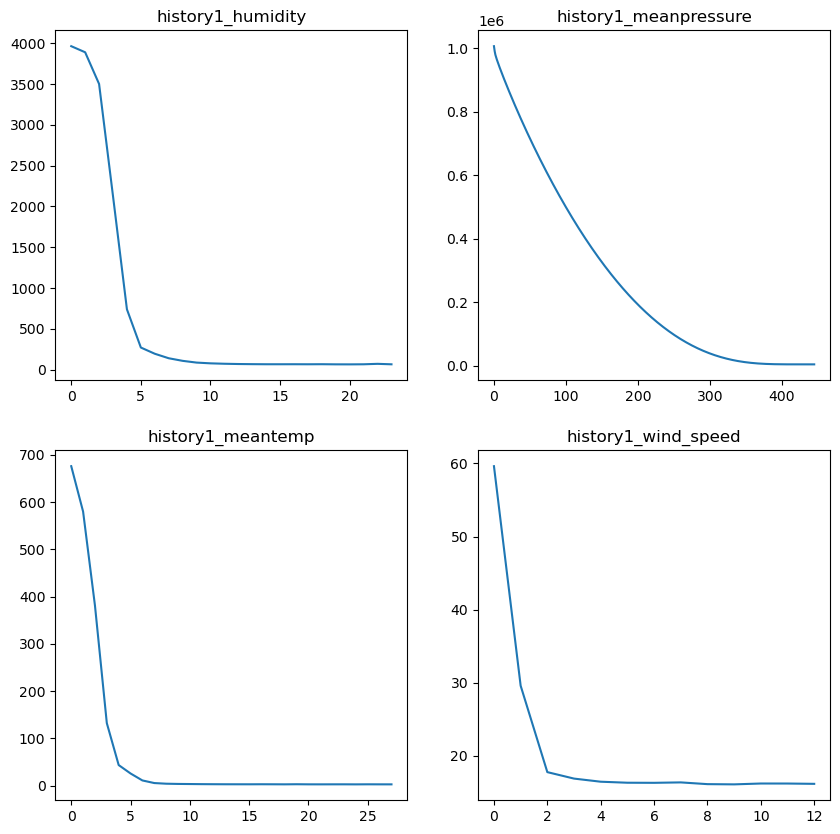

In [43]:
gen_hist = Gen_hist()
fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
for i in range(2):
    for j in range(2):
        hist_now = next(gen_hist)
        axes[i,j].plot(eval(hist_now).history['loss'])
        axes[i,j].set_title(hist_now)
plt.savefig('loss_history.png')

In [45]:
def Gen_test():
    all_test = ['x_test_wind_speed','x_test_humidity','x_test_meantemp','x_test_meanpressure']
    all_y = ['y_test_wind_speed','y_test_humidity','y_test_meantemp','y_test_meanpressure']
    all_model = ['model1_wind_speed','model1_humidity','model1_meantemp','model1_meanpressure']
    for test in zip(all_test,all_y,all_model):
        yield test

2/2 [==============================] - 0s 3ms/step


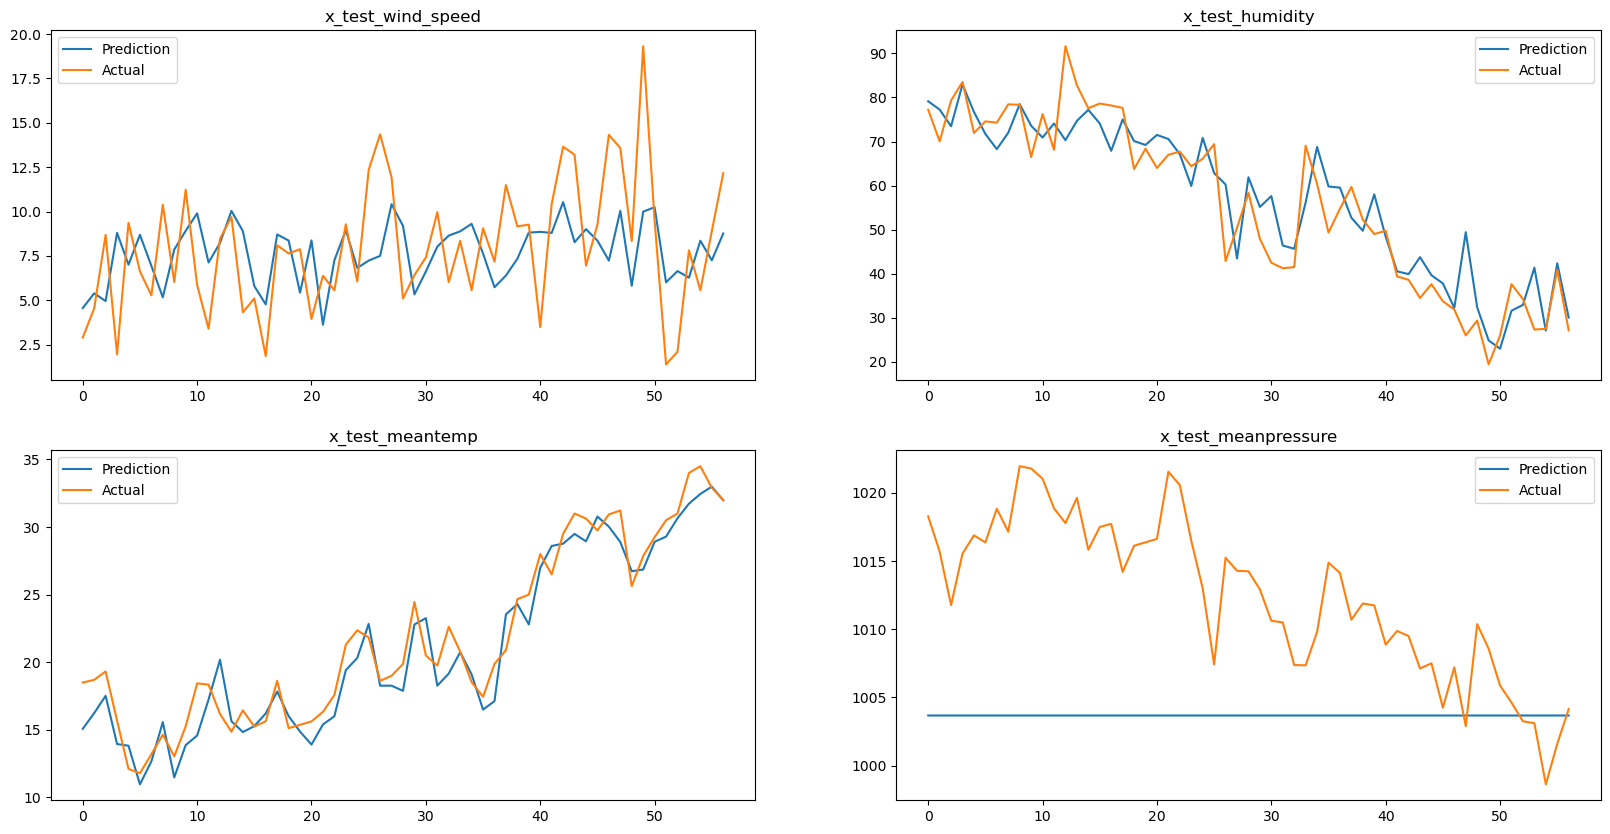

In [46]:
gen_test = Gen_test()
fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(20,10))
for i in range(2):
    for j in range(2):
        test_now = next(gen_test)
        axes[i,j].plot(eval(test_now[2]).predict(eval(test_now[0])),label='Prediction')
        axes[i,j].plot(eval(test_now[1]),label='Actual')
        axes[i,j].set_title(test_now[0])
        axes[i,j].legend()
plt.savefig('prediction.png')

### The task involved training models using recurrent neural networks (RNNs) for forecasting weather-related parameters, focusing on humidity. Throughout the process, several steps were followed:

### 1. Model Training:
- Multiple models were trained using RNN architectures (specifically LSTM and GRU) to forecast weather parameters (humidity in this case).
- The training involved splitting the dataset into training and validation sets.
- Adjustments in RNN layers, hyperparameters, and callbacks like early stopping were used during the training process to optimize the models.

### 2. Evaluation on Validation Data:
- The models were evaluated on the validation data, calculating Mean Absolute Error (MAE) to assess their performance.
- The MAE is a metric indicating the average absolute difference between predictions and actual values. Lower MAE values signify better performance.

### 3. Evaluation on Testing Data:
- Finally, the trained models were evaluated on the unseen testing dataset to provide an assessment of their generalization performance.
- Evaluating the models on the testing set helps to understand how well they perform on new, unseen data, providing insights into real-world applicability.

### Conclusion:
- The validation and testing evaluations, especially in terms of MAE, provide a measure of the models' performance and their ability to forecast humidity accurately.
- The comparison of models' performances on both validation and testing data helps in understanding their robustness and generalization capacity.
- Lower MAE on the testing data indicates that the models are better at predicting humidity and can potentially be more reliable in real-world applications.

The choice of the final model or the most suitable approach relies on its performance, specifically the MAE, on the testing data and its consistency with the performance observed during validation. Lower MAE on the testing set typically signifies a more reliable and effective model for weather forecasting tasks.